In [237]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from scipy.optimize import curve_fit

In [238]:
def readFile(filename):
    timeTickFirst, timeTickLast, x, ion3, ion3_raw, ion3_bottom, ion3_top, ion4, ion4_raw, ion4_bottom, \
    ion4_top, ion5, ion5_raw, ion5_bottom, ion5_top, ion2, ion2_raw, ion2_bottom, ion2_top, ion6, ion6_raw, \
    ion6_bottom, ion6_top\
      = np.loadtxt(filename, comments='#', delimiter='\t', converters=None, 
                   skiprows=0,unpack=True, encoding='latin1')
    return x, ion4

In [239]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Global beam only

In [240]:
import pandas as pd
df_1 = pd.read_excel('Global_QWP_adjustment.xlsx',sheet_name = 'Linear polarization')
df_1

,DDS00,Tone 1 only (mW),Ramsey period,frequency,filename
0,28,24.250,0.100,10.000000,ramsey_micrwave_rfsoc_002
1,25,19.250,0.130,7.692308,ramsey_micrwave_rfsoc_003
2,20,12.280,0.206,4.854369,ramsey_micrwave_rfsoc_004
3,15,6.910,0.332,3.012048,ramsey_micrwave_rfsoc_005
4,10,3.030,0.772,1.295337,ramsey_micrwave_rfsoc_006
5,5,0.761,2.000,0.500000,ramsey_micrwave_rfsoc_007
6,0,0.004,10.000,0.100000,ramsey_micrwave_rfsoc_001


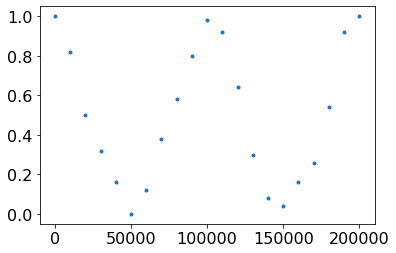

In [160]:
filename = df_1['filename'][0]
time, ramsey = readFile(filename)
plt.plot(time, ramsey, '.')

In [161]:
def func(x, A, B, theta, T):
    return 0.5*np.cos(x/T*2*np.pi)+0.5

In [162]:
def FitRamsey(xdata, ydata, guess=[0.5,0.5,0.1*np.pi, 100000]):
    popt, pcov = curve_fit(func, xdata, ydata, guess, sigma=np.sqrt(ydata*(1-ydata)/100)+0.0001,\
                          bounds=([0.0,0.0,-np.pi,0],[1.0,1.0,np.pi,1e7]))
    plt.figure(figsize=(10,6))
    plt.plot(xdata, func(xdata, *popt), 'b-', label='fit: T=%5.3f' % popt[-1])
    plt.errorbar(xdata, ydata, yerr=np.sqrt(ydata*(1-ydata)/100),\
                 ls='', marker='o',mec='firebrick', ecolor='firebrick',mfc='pink')
    plt.legend()
    plt.ylim([-0.05,1.05])
    plt.xlabel('Wait time (us)')
    plt.ylabel('Population')
    plt.show()
    T = popt[-1]
    sigma_T = np.sqrt(np.diag(pcov)[-1])
    delta = 1e6/T
    sigma_delta = delta*sigma_T/T
    print(popt)
    print('Stark_shift = '+str(delta)+' +/- '+str(sigma_delta)+' Hz')
    return delta, sigma_delta

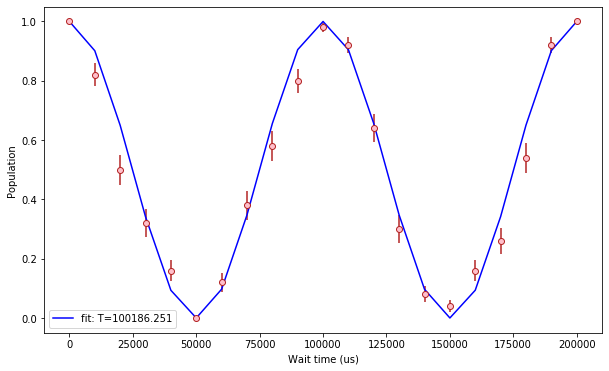

[1.00000000e+00 5.04391655e-03 1.22217830e-02 1.00186251e+05]
Stark_shift = 9.981409515653551 +/- 0.030775982363045316 Hz


In [117]:
filename = 'ramsey_microwave_rfsoc_002'
xdata, ydata = readFile(filename)
guess = np.array([1, 0.5, 0.1*np.pi, 100000])
delta, sigma_delta = FitRamsey(xdata, ydata, guess)

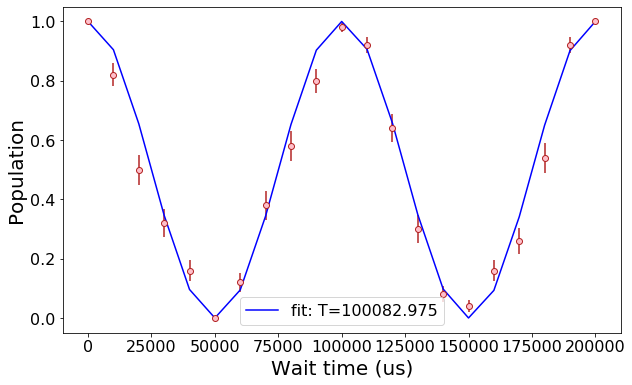

[1.00000000e+00 5.00000000e-01 2.55610432e-01 1.00082975e+05]
Stark_shift = 9.991709394717972 +/- 0.023405117394733777 Hz


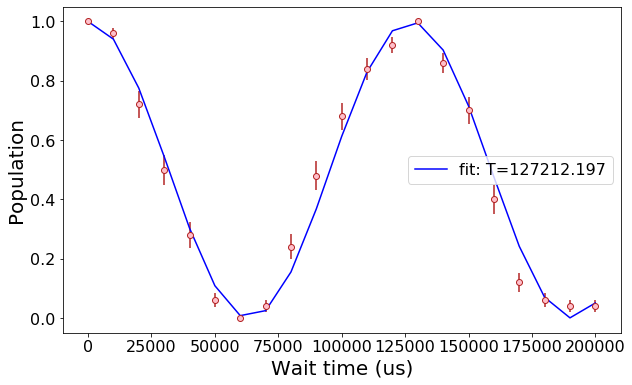

[1.00000000e+00 5.00000000e-01 3.14159265e-01 1.27212197e+05]
Stark_shift = 7.860881472161904 +/- 0.03431188878364883 Hz


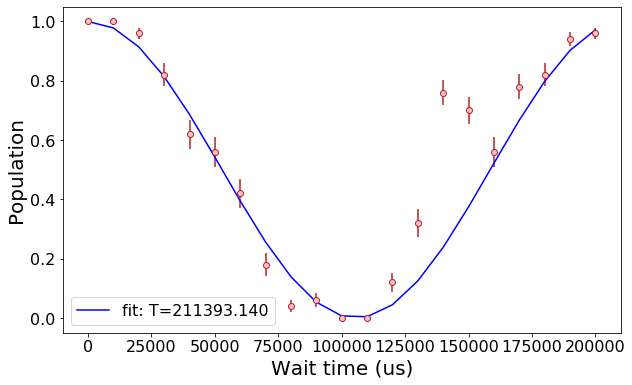

[1.00000000e+00 5.00000000e-01 3.37029799e-01 2.11393140e+05]
Stark_shift = 4.730522486935482 +/- 0.0818315036312883 Hz


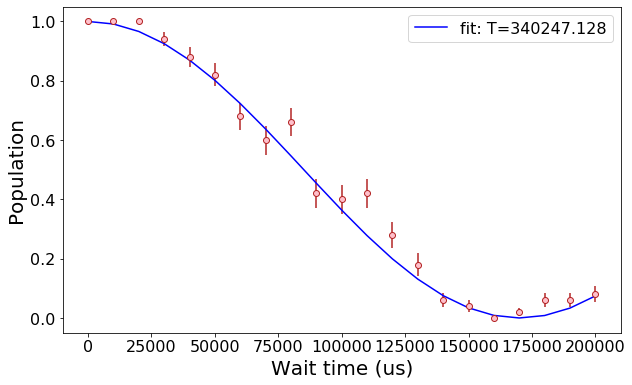

[1.00000000e+00 5.00000000e-01 3.62571819e-01 3.40247128e+05]
Stark_shift = 2.939040234702213 +/- 0.09024508611227529 Hz


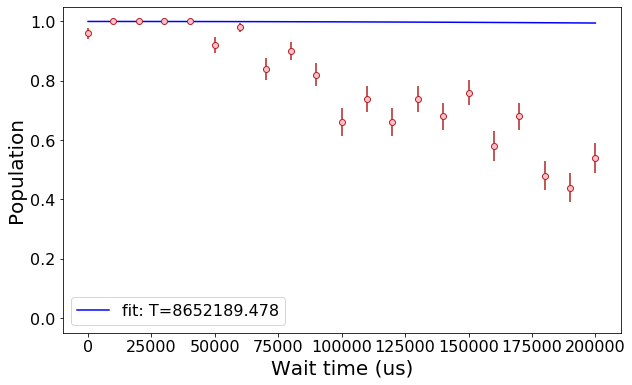

[1.00000000e+00 5.00000000e-01 3.14159265e-01 8.65218948e+06]
Stark_shift = 0.11557768152403512 +/- 0.15402580052013043 Hz


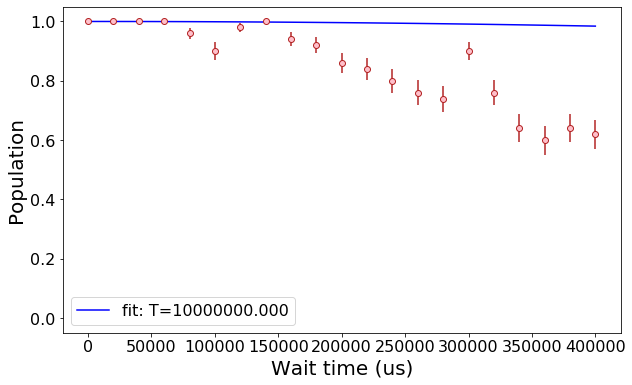

[1.00000000e+00 5.00000000e-01 3.14159265e-01 1.00000000e+07]
Stark_shift = 0.10000000000000002 +/- 0.017378874536674655 Hz


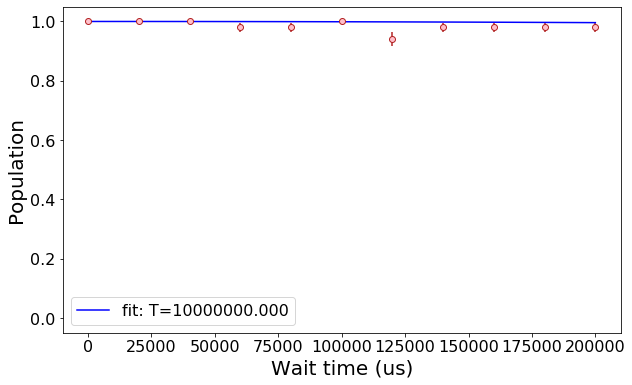

[1.00000000e+00 5.00000000e-01 3.14159265e-01 1.00000000e+07]
Stark_shift = 0.10000000000000002 +/- 0.020320362047215036 Hz


In [186]:
guess_T = [100e3, 130e3, 200e3, 310e3, 800e3, 2e6, 1e7]
deltas_global = []
sigma_deltas_global = []
for i in range(len(df_1)):
    filename = df_1['filename'][i]
    xdata, ydata = readFile(filename)
    guess = np.array([1, 0.5, 0.1*np.pi, guess_T[i]])
    delta, sigma_delta = FitRamsey(xdata, ydata, guess)
    deltas_global.append(delta*(-1.0))
    sigma_deltas_global.append(sigma_delta)

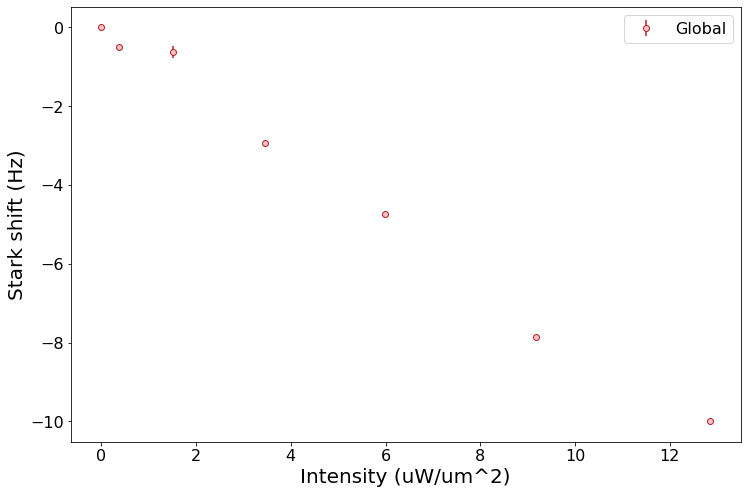

In [194]:
deltas_global[-1] = 0
deltas_global[-2] = -0.5
deltas_global[-3] = -0.625
intensity_global = df_1['Intensity (uW/um^2)']
plt.figure(figsize = (12,8))
plt.errorbar(intensity_global, deltas_global, yerr=sigma_deltas_global,\
                 ls='', marker='o',mec='firebrick', ecolor='firebrick',mfc='pink', label = 'Global')
plt.xlabel('Intensity (uW/um^2)')
plt.ylabel('Stark shift (Hz)')
plt.legend()

# Individual beam only

In [189]:
df_2 = pd.read_excel('Global_QWP_adjustment.xlsx',sheet_name = 'Ind Linear polarization')
df_2

,DDS10,Tone 1 only (uW),Intensity (uW/um^2),Ramsey period,Individual Frequency,filename
0,70,701.800,113.280871,0.00898,-111.358575,ramsey_microwave_rfsoc_033
1,60,530.300,85.598242,0.01160,-86.206897,ramsey_microwave_rfsoc_034
2,50,352.600,56.914841,0.01800,-55.555556,ramsey_microwave_rfsoc_035
3,40,183.000,29.538899,0.03420,-29.239766,ramsey_microwave_rfsoc_036
4,30,68.100,10.992344,0.09330,-10.718114,ramsey_microwave_rfsoc_037
5,20,15.010,2.422835,0.48500,-2.061856,ramsey_microwave_rfsoc_038
6,10,1.050,0.169485,2.80000,-0.357143,ramsey_microwave_rfsoc_039
7,0,0.053,0.008555,10.00000,-0.100000,ramsey_microwave_rfsoc_032


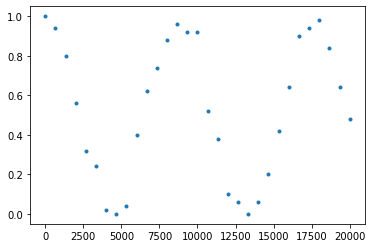

In [149]:
filename = 'ramsey_microwave_rfsoc_033'
time, ramsey = readFile(filename)
plt.plot(time, ramsey, '.')

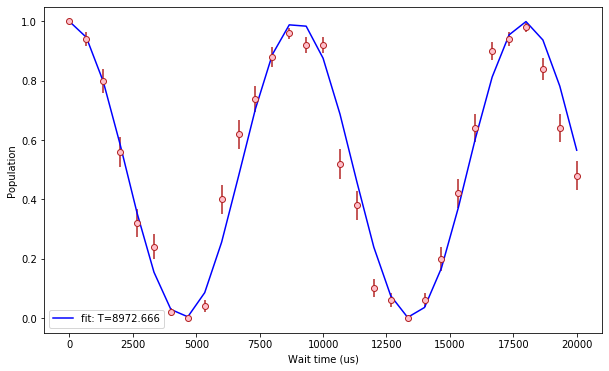

[ 1.00000000e+00  5.00000000e-01 -2.92931555e-02  8.97266561e+03]
Stark_shift = 111.44960073843482 +/- 0.21155185239574617 Hz


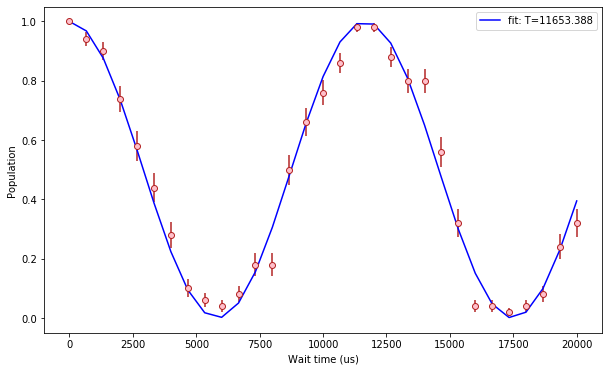

[1.00000000e+00 5.00000000e-01 3.14159265e-01 1.16533878e+04]
Stark_shift = 85.81195609766715 +/- 0.4433586943603333 Hz


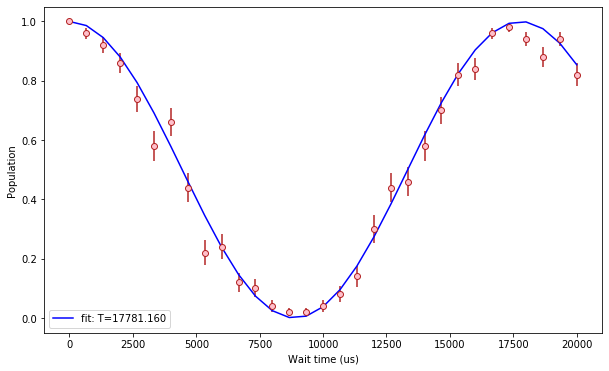

[1.00000000e+00 5.00000000e-01 3.14159265e-01 1.77811597e+04]
Stark_shift = 56.23930143537559 +/- 0.38878391277154944 Hz


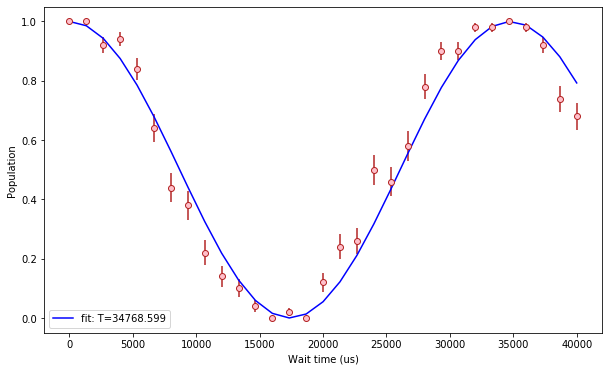

[1.00000000e+00 5.00000000e-01 3.14159265e-01 3.47685987e+04]
Stark_shift = 28.761584800867723 +/- 0.26138056066083326 Hz


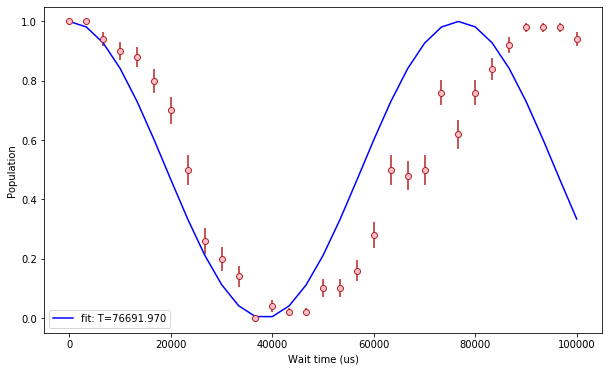

[1.00000000e+00 5.00000000e-01 3.14428662e-01 7.66919704e+04]
Stark_shift = 13.039174690770253 +/- 0.23321002943645763 Hz


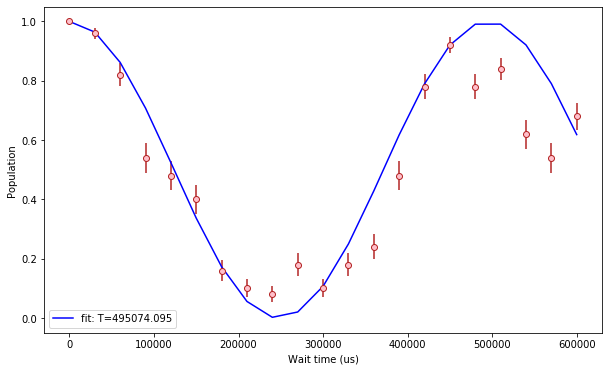

[1.00000000e+00 5.00000000e-01 3.14159265e-01 4.95074095e+05]
Stark_shift = 2.019899668814159 +/- 0.03912849986417784 Hz


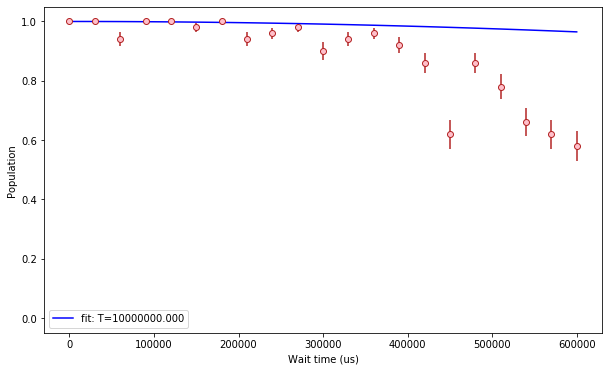

[1.00000000e+00 5.00000000e-01 3.14159265e-01 1.00000000e+07]
Stark_shift = 0.10000000000000002 +/- 0.01343206958411346 Hz


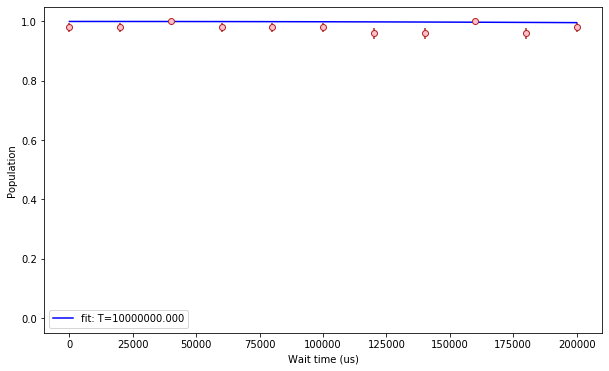

[1.00000000e+00 5.00000000e-01 3.14159265e-01 1.00000000e+07]
Stark_shift = 0.10000000000000002 +/- 0.0192349504304525 Hz


In [150]:
guess_T = [8e3, 12e3, 18e3, 35e3, 95e3, 500e3, 1e7, 1e7]
deltas_ind = []
sigma_deltas_ind = []
for i in range(len(df)):
    filename = df_2['filename'][i]
    xdata, ydata = readFile(filename)
    guess = np.array([1, 0.5, 0.1*np.pi, guess_T[i]])
    delta, sigma_delta = FitRamsey(xdata, ydata, guess)
    deltas_ind.append(delta*(-1.0))
    sigma_deltas_ind.append(sigma_delta)

In [151]:
intensity_ind = df_2['Intensity (uW/um^2)']

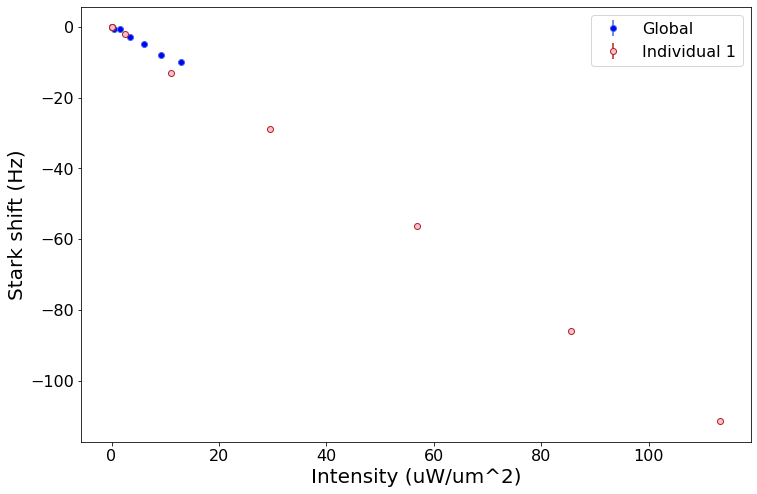

In [195]:
plt.figure(figsize = (12,8))
plt.errorbar(intensity_global, deltas_global, yerr=sigma_deltas_global,\
                 ls='', marker='o',mec='royalblue', ecolor='royalblue',mfc='blue', label = 'Global')
plt.errorbar(intensity_ind, deltas_ind, yerr=sigma_deltas_ind,\
                 ls='', marker='o',mec='firebrick', ecolor='firebrick',mfc='pink', label = 'Individual 1')
plt.xlabel('Intensity (uW/um^2)')
plt.ylabel('Stark shift (Hz)')
plt.legend()

In [196]:
def Starkshift(x, a):
    return a * x
def SSFit(xdata, ydata, yerr):
    popt, pcov = curve_fit(Starkshift, xdata, ydata, sigma=yerr, absolute_sigma= False)
    print(r'alpha= '+str(popt[0])+r'$\pm$'+str(np.sqrt(np.diag(pcov)[0]))+r'Hz*um^2/uW')
    fitY = [Starkshift(x, popt[0]) for x in xdata]
    plt.figure(figsize=(10,6))
    plt.plot(xdata, Starkshift(xdata,*popt), 'grey', label = 'fit: alpha=%5.3f' % tuple(popt))
    plt.errorbar(xdata, ydata, yerr,ls='',marker='o',mec='firebrick',ecolor='firebrick',mfc='pink')
    plt.xlabel('Intensity (uW/um^2)')
    plt.ylabel('Stark shift (Hz)')
    plt.legend()
    plt.show()
    return popt, pcov

alpha= -0.7932938861282638$\pm$0.014904315797692242Hz*um^2/uW


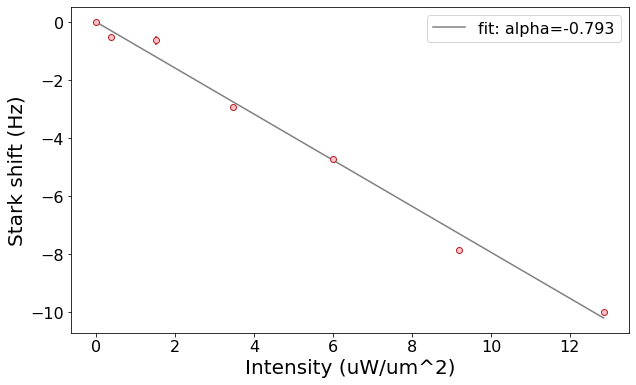

In [197]:
popt1, pcov1 = SSFit(intensity_global, deltas_global, yerr=sigma_deltas_global)

alpha= -0.9851279806137576$\pm$0.009676552756972443Hz*um^2/uW


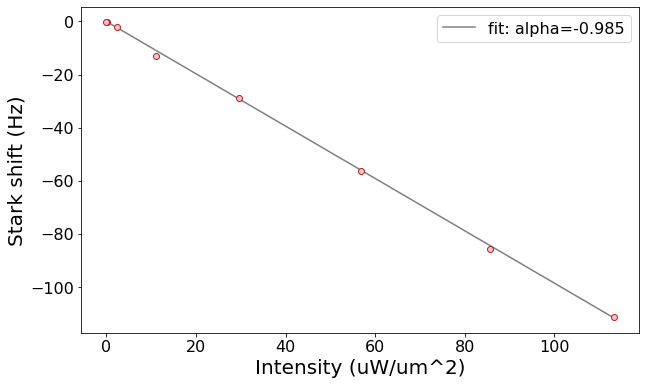

In [198]:
popt2, pcov2 = SSFit(intensity_ind, deltas_ind, yerr=sigma_deltas_ind)

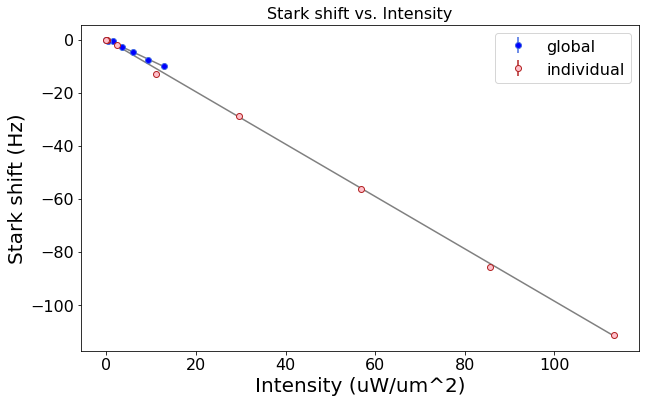

In [236]:
plt.figure(figsize=(10,6))
plt.plot(intensity_global, Starkshift(intensity_global,*popt1), 'grey')
plt.errorbar(intensity_global, deltas_global, sigma_deltas_global,ls='',
             marker='o',mec='royalblue',ecolor='royalblue',mfc='blue', label = 'global')

plt.plot(intensity_ind, Starkshift(intensity_ind,*popt2), 'grey')
plt.errorbar(intensity_ind, deltas_ind, sigma_deltas_ind,ls='',marker='o',
             mec='firebrick',ecolor='firebrick',mfc='pink', label = 'individual')
plt.xlabel('Intensity (uW/um^2)')
plt.ylabel('Stark shift (Hz)')
plt.legend()
plt.title('Stark shift vs. Intensity')
plt.show()

# Global and Individual 

In [205]:
df_3 = pd.read_excel('StarkShift.xlsx',sheet_name = 'Pi_time')
df_3

,Global intensity (uW/um^2),Pi time (us),16.89,9.18,5.99,3.45,1.5,0.38
0,Individual intensity (uW/um^2),113.28,3.777527,4.314101,5.324442,6.952434,10.234493,20.943783
1,NaN,56.91,5.231476,6.196092,7.459446,9.834630,14.709678,31.177274
2,NaN,10.99,12.055787,13.782611,16.332006,22.790566,34.432957,67.753398
3,NaN,0.17,80.052667,112.874304,139.953353,189.595385,274.922400,554.798067


In [211]:
df_4 = pd.read_excel('StarkShift.xlsx',sheet_name = 'Avg_Stark shift')
df_4

,Global intensity (uW/um^2),Stark shift (Hz),16.89,9.18,5.99,3.45,1.5,0.38
0,Individual intensity (uW/um^2),113.28,0.000187,0.001480,0.000589,0.000438,0.000916,0.000376
1,NaN,56.91,0.000918,0.002237,-0.000368,0.000278,0.000190,0.000057
2,NaN,10.99,0.001792,0.001286,0.000715,0.000159,0.000409,-0.000008
3,NaN,0.17,0.000722,0.000457,0.000314,0.000103,0.000037,0.000000


In [209]:
df_5 = pd.read_excel('StarkShift.xlsx',sheet_name = 'Std_Stark shift')
df_5

,Global intensity (uW/um^2),Std,16.89,9.18,5.99,3.45,1.5,0.38
0,Individual intensity (uW/um^2),113.28,0.001705,0.002296,0.001378,0.000797,0.000780,0.000755
1,NaN,56.91,0.001056,0.000920,0.001269,0.001549,0.000386,0.000300
2,NaN,10.99,0.001498,0.000748,0.000613,0.000404,0.000137,0.000104
3,NaN,0.17,0.000277,0.000135,0.000067,0.000044,0.000061,0.000028


In [210]:
global_intensity = np.array([16.89, 9.18, 5.99, 3.45, 1.5, 0.38])
ind_intensity = np.array([113.28, 56.91, 10.99, 0.17])

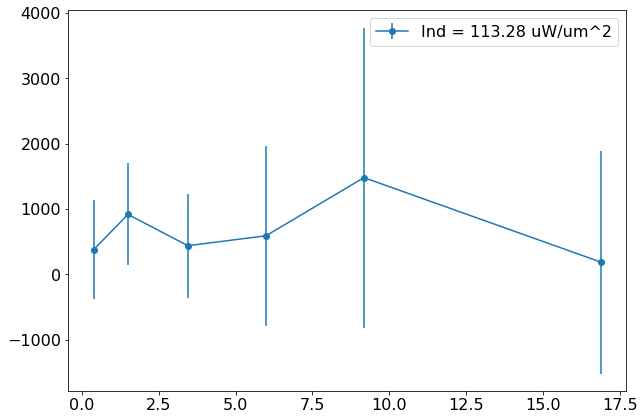

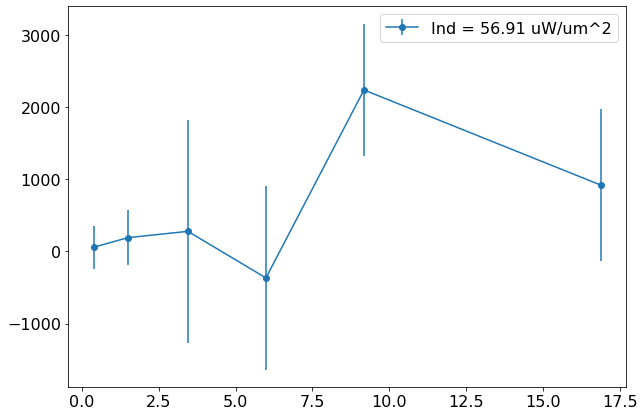

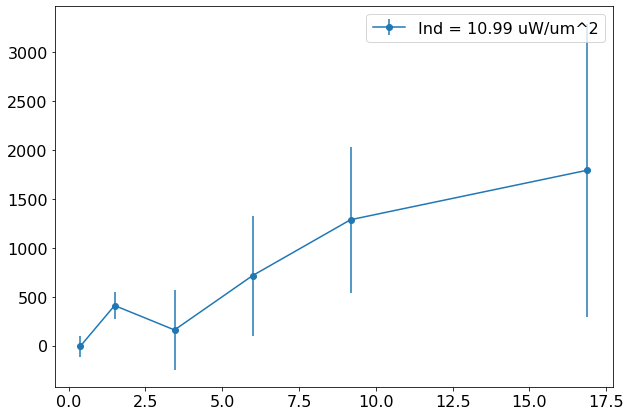

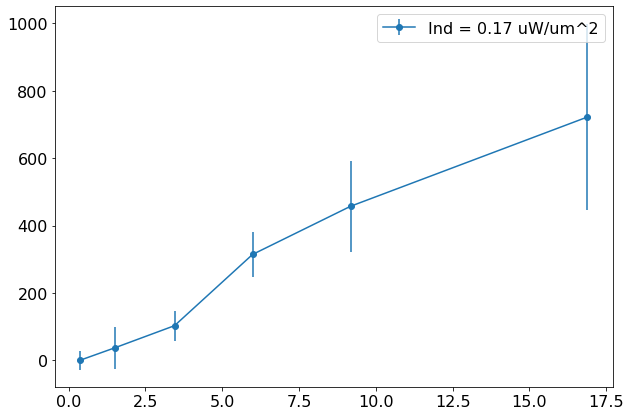

In [235]:
# plt.figure(figsize = (16,10))
for i in range(len(ind_intensity)): 
    plt.figure(figsize = (10,7))
    plt.errorbar(global_intensity, df_4.loc[i][2:]*1e6, df_5.loc[i][2:]*1e6, 
                 label = 'Ind = '+str(ind_intensity[i])+' uW/um^2', marker='o')
    plt.legend()

In [222]:
df_4.loc[0][2:]

16.89    0.000187406
9.18      0.00147955
5.99      0.00058946
3.45     0.000437918
1.50     0.000916469
0.38     0.000375979
Name: 0, dtype: object